In [3]:
import numpy as np
import math
import scipy.io as scio
import matplotlib.pyplot as plt
import scipy.misc
import random

In [4]:
# g(x) function
def logistic(x):
    return 1 / (1 + (1/np.exp(x)))

In [5]:
# g_(x) function 
def d_logistic(x):
    return logistic(x) * (1 - logistic(x))

In [6]:
# gradient descent accepts filter, input img, learning rate and no. of iteration
def gradient_descent(f, sgx_train_shape, ro, iter):
    errors = np.zeros(iter)
    for i in range(iter):
        ftx = np.dot(np.transpose(f), sgx_train_shape)
        err = sg_train_shape - logistic(ftx)
        errors[i] = ((np.dot(err, np.transpose(err))) / (198 * 198))
        val = err * d_logistic(ftx)
        dedf = - 2 * np.dot(sgx_train_shape, val.transpose())/(198*198)
        nabala_f = -dedf
        f = f + ro * nabala_f
    return f, errors

Importing all images in Python

In [7]:
sgx_train = scipy.misc.imread("sgx_train.jpg")
sg_train = scipy.misc.imread("sg_train.jpg")
sgx_test = scipy.misc.imread("sgx_test.jpg")

Normalizing pixels in all images:

In [8]:
sgx_train = sgx_train/255
sg_train = sg_train/255
sgx_test = sgx_test/255

Modifying dimensions of the noisy training image:

In [16]:
sgx_train_shape = np.zeros((9, 198*198))
val = 0
for i in range(0, 198):
    for j in range(0, 198):
        patch = np.reshape(np.array(sgx_train[i:i+3, j:j+3]), (9,1))
        sgx_train_shape[:, val:(val+1)] = patch
        val = val + 1

Removing some pixels from the clean  train image, so as to allow matrix multiplications. Also, reshaping it.

In [10]:
sg_train_ = sg_train[0:198, 0:198]
sg_train_shape = np.reshape(sg_train_, (1, 39204))

In [11]:
sgx_test_shape = np.zeros((9, 198*198))
val = 0
for i in range(0, 198):
    for j in range(0, 198):
        patch = np.reshape(np.array(sgx_train[i:i+3, j:j+3]), (9,1))
        sgx_test_shape[:, val:(val+1)] = patch
        val = val + 1

Initializing the filter

In [18]:
f = np.random.rand(9,1)

In [19]:
new_filter, errors = gradient_descent(f, sgx_train_shape, 0.01, 10000)

Denoising images is applying learned filter (f) to noisy image
f.transpose * noisy_image

In [23]:
denoise_train = np.dot(np.transpose(new_filter), sgx_train_shape)
denoise_train_sgx = np.reshape(denoise_train, (198, 198))
denoise_test = np.dot(np.transpose(new_filter), sgx_test_shape)
denoise_test_sgx = 1 * np.reshape(denoise_test, (198, 198))

Plotting Noised Image and denoised image

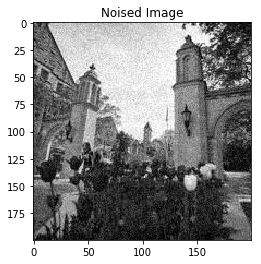

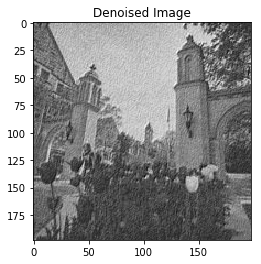

In [24]:
plt.grid(False)
plt.imshow(sgx_train, cmap = 'gray')
plt.title("Noised Image")
plt.show()
plt.grid(False)
plt.title("Denoised Image")
plt.imshow(denoise_train_sgx, cmap = 'gray')
plt.show()

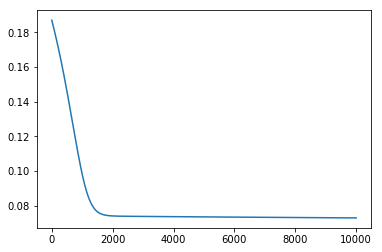

In [21]:
plt.plot(errors)
plt.show()